In [1]:
import sys
sys.path.append('../src')
from Mapping import *
from PCA import *

import pickle
import matplotlib
import matplotlib.pyplot as plt

In [2]:
V5 = pickle.load(open('../data/V5.p','rb'))
cp_list = V5["cp_list"]
active_L_table_slide_DOA = V5["active_L_table_slide_DOA"]
active_L_table_slide_matrix = V5["active_L_table_slide_matrix"]
active_long_table_slide_DOA = V5["active_long_table_slide_DOA"]
active_long_table_slide_matrix = V5["active_long_table_slide_matrix"]

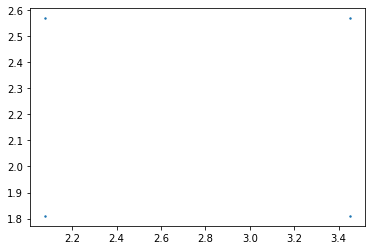

In [3]:
room_x = [i[0] for i in ROOM_COORDINATES[:4]]
room_y = [i[1] for i in ROOM_COORDINATES[:4]]
plt.scatter(room_x, room_y, s=2)

In [4]:
import torch
import torch.nn as nn
import random

In [5]:
input_size = 15
output_size = 2
hidden_size = 10
num_epochs = 2
learning_rate = 0.0001

In [6]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.l2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        output = self.l1(x)
        output = self.relu(output)
        output = self.l2(output)
        return output
    

In [7]:
model = NeuralNet(input_size, hidden_size, output_size)
model = model.float()

In [8]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
# first four are table coordinates
cp_torch = [torch.from_numpy(cp) for cp in cp_list[:4]]
room_coords = [torch.from_numpy(np.array([i[0], i[1]])) for i in ROOM_COORDINATES[:4]]

In [10]:
X = cp_torch
y = room_coords

In [31]:
for i in range(10000):
    for x_i, y_i in zip(X, y):
    
        outputs = model(x_i.float())
        loss = criterion(outputs, y_i.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        print(loss.item())

0.02336950972676277
0.025647802278399467
0.01885804533958435
0.02906935289502144
0.02336885780096054
0.025644823908805847
0.018857751041650772
0.02906564623117447
0.023368237540125847
0.025641847401857376
0.018857421353459358
0.029061902314424515
0.02336760237812996
0.025638889521360397
0.018857132643461227
0.02905820496380329
0.023366980254650116
0.025635914877057076
0.01885683462023735
0.029054507613182068
0.02336631901562214
0.025632942095398903
0.018856538459658623
0.029050804674625397
0.02336570993065834
0.02562996745109558
0.018856219947338104
0.029047071933746338
0.023365063592791557
0.02562701143324375
0.018855921924114227
0.029043372720479965
0.023364441469311714
0.02562403306365013
0.018855618312954903
0.029039671644568443
0.023363806307315826
0.0256210770457983
0.018855305388569832
0.029035955667495728
0.023363204672932625
0.025618113577365875
0.018854962661862373
0.029032213613390923
0.023362573236227036
0.025615178048610687
0.018854647874832153
0.029028519988059998
0.02336

0.028648560866713524
0.02329341694712639
0.025303689762949944
0.018823551014065742
0.028644943609833717
0.023292742669582367
0.025300748646259308
0.01882321387529373
0.02864132821559906
0.023292068392038345
0.02529781311750412
0.018822867423295975
0.028637651354074478
0.023291433230042458
0.025294892489910126
0.018822552636265755
0.02863398939371109
0.02329077199101448
0.02529194764792919
0.018822237849235535
0.028630370274186134
0.023290103301405907
0.02528902143239975
0.01882193796336651
0.028626739978790283
0.02328943833708763
0.025286095216870308
0.01882162317633629
0.02862308733165264
0.02328878454864025
0.02528313547372818
0.018821321427822113
0.02861947938799858
0.023288117721676826
0.025280209258198738
0.018821028992533684
0.028615860268473625
0.023287441581487656
0.025277284905314445
0.018820686265826225
0.02861223928630352
0.02328677661716938
0.025274362415075302
0.01882033422589302
0.02860858291387558
0.02328612469136715
0.02527143806219101
0.018820026889443398
0.02860493585

0.025008782744407654
0.018791625276207924
0.0282816831022501
0.02322406880557537
0.025005867704749107
0.018791304901242256
0.028278108686208725
0.023223379626870155
0.02500295639038086
0.018790962174534798
0.02827456220984459
0.023222701624035835
0.025000056251883507
0.018790658563375473
0.028270963579416275
0.02322201244533062
0.024997148662805557
0.018790340051054955
0.0282673928886652
0.023221341893076897
0.02499426156282425
0.018790025264024734
0.028263811022043228
0.02322065830230713
0.0249913539737463
0.018789706751704216
0.028260258957743645
0.02321997657418251
0.024988438934087753
0.0187893845140934
0.02825668267905712
0.023219291120767593
0.024985551834106445
0.018789077177643776
0.02825312688946724
0.023218607529997826
0.024982646107673645
0.018788741901516914
0.02824953943490982
0.02321792021393776
0.024979759007692337
0.018788395449519157
0.028245985507965088
0.02321723662316799
0.024976857006549835
0.018788089975714684
0.028242409229278564
0.023216551169753075
0.0249739456

0.02315426431596279
0.02471793442964554
0.018758272752165794
0.027924316003918648
0.02315356582403183
0.02471506968140602
0.018757924437522888
0.027920786291360855
0.023152858018875122
0.024712221696972847
0.01875758357346058
0.027917280793190002
0.02315216325223446
0.02470935322344303
0.01875724270939827
0.02791375108063221
0.02315145917236805
0.02470649965107441
0.018756894394755363
0.02791024185717106
0.023150762543082237
0.024703649803996086
0.01875656470656395
0.027906719595193863
0.023150049149990082
0.02470078133046627
0.01875622756779194
0.027903204783797264
0.023149337619543076
0.024697914719581604
0.018755901604890823
0.027899716049432755
0.02314862050116062
0.02469504624605179
0.018755586817860603
0.0278962142765522
0.02314789779484272
0.02469215728342533
0.018755260854959488
0.02789272554218769
0.023147186264395714
0.024689288809895515
0.018754921853542328
0.02788921445608139
0.023146484047174454
0.024686427786946297
0.018754588440060616
0.027885712683200836
0.0231457836925

0.018718969076871872
0.027537621557712555
0.023074233904480934
0.024401241913437843
0.01871861144900322
0.02753416635096073
0.02307351678609848
0.02439841441810131
0.01871827431023121
0.027530720457434654
0.02307279407978058
0.024395601823925972
0.018717922270298004
0.027527252212166786
0.023072073236107826
0.02439279854297638
0.018717551603913307
0.027523791417479515
0.023071350529789925
0.024390000849962234
0.018717186525464058
0.027520332485437393
0.023070629686117172
0.0243871808052063
0.018716823309659958
0.027516882866621017
0.02306991256773472
0.024384338408708572
0.01871647499501705
0.027513455599546432
0.023069173097610474
0.02438153512775898
0.018716121092438698
0.02751000039279461
0.023068446666002274
0.02437872439622879
0.018715769052505493
0.027506548911333084
0.02306772768497467
0.024375878274440765
0.01871543563902378
0.027503104880452156
0.023066991940140724
0.02437306009232998
0.018715091049671173
0.02749965712428093
0.023066261783242226
0.02437024749815464
0.018714727

0.02409696951508522
0.01867886260151863
0.027161680161952972
0.022992784157395363
0.024094218388199806
0.018678462132811546
0.027158286422491074
0.02299204282462597
0.024091485887765884
0.018678070977330208
0.02715487778186798
0.02299131453037262
0.02408873848617077
0.018677694723010063
0.02715146355330944
0.02299056202173233
0.02408599480986595
0.018677299842238426
0.027148066088557243
0.022989807650446892
0.024083228781819344
0.018676908686757088
0.02714470587670803
0.02298906072974205
0.02408047579228878
0.0186765156686306
0.027141328901052475
0.022988326847553253
0.024077726528048515
0.01867612823843956
0.02713792212307453
0.02298755943775177
0.024074971675872803
0.018675750121474266
0.027134545147418976
0.022986799478530884
0.0240721944719553
0.01867537386715412
0.027131162583827972
0.022986046969890594
0.02406943216919899
0.018675023689866066
0.02712778002023697
0.022985298186540604
0.024066666141152382
0.018674669787287712
0.02712438628077507
0.02298453077673912
0.02406390011310

0.022908583283424377
0.0237899050116539
0.01863551326096058
0.026785217225551605
0.02290782518684864
0.023787157610058784
0.018635112792253494
0.02678188867866993
0.022907042875885963
0.0237844567745924
0.018634706735610962
0.02677854523062706
0.022906281054019928
0.023781709372997284
0.018634337931871414
0.026775212958455086
0.02290550246834755
0.02377898618578911
0.01863395981490612
0.026771897450089455
0.022904742509126663
0.02377624437212944
0.01863355189561844
0.026768581941723824
0.022903963923454285
0.02377353236079216
0.018633145838975906
0.026765232905745506
0.0229032002389431
0.02377081662416458
0.018632737919688225
0.026761895045638084
0.022902412340044975
0.02376808412373066
0.018632378429174423
0.0267585851252079
0.022901616990566254
0.023765332996845245
0.018632030114531517
0.026755275204777718
0.02290082909166813
0.023762589320540428
0.018631651997566223
0.026751995086669922
0.022900046780705452
0.023759834468364716
0.018631283193826675
0.02674870751798153
0.022899257019

0.023479662835597992
0.018589146435260773
0.02640540525317192
0.022818539291620255
0.023476993665099144
0.018588760867714882
0.026402143761515617
0.022817736491560936
0.02347431890666485
0.01858832873404026
0.026398874819278717
0.02281697653234005
0.023471666499972343
0.018587887287139893
0.026395581662654877
0.022816186770796776
0.023469015955924988
0.018587451428174973
0.026392290368676186
0.02281542494893074
0.023466365411877632
0.01858704909682274
0.02638900838792324
0.022814638912677765
0.02346370927989483
0.018586592748761177
0.026385752484202385
0.022813867777585983
0.023461058735847473
0.01858617179095745
0.026382459327578545
0.022813061252236366
0.02345837838947773
0.018585754558444023
0.026379171758890152
0.02281228080391884
0.023455724120140076
0.01858537457883358
0.02637590654194355
0.022811487317085266
0.02345305308699608
0.018584957346320152
0.026372650638222694
0.022810710594058037
0.02345038205385208
0.01858453080058098
0.026369374245405197
0.022809917107224464
0.023447

0.01853925921022892
0.026028331369161606
0.022726692259311676
0.02317056991159916
0.018538828939199448
0.026025107130408287
0.0227259062230587
0.023167939856648445
0.018538370728492737
0.026021858677268028
0.022725112736225128
0.023165322840213776
0.018537918105721474
0.026018623262643814
0.022724317386746407
0.023162702098488808
0.018537499010562897
0.02601541206240654
0.02272350713610649
0.023160066455602646
0.018537070602178574
0.02601218968629837
0.022722717374563217
0.023157447576522827
0.018536608666181564
0.02600894682109356
0.022721923887729645
0.02315482683479786
0.018536163493990898
0.026005707681179047
0.022721124812960625
0.02315220981836319
0.01853572018444538
0.02600247412919998
0.02272031456232071
0.023149576038122177
0.018535327166318893
0.025999290868639946
0.02271950989961624
0.023146942257881165
0.018534865230321884
0.025996064767241478
0.022718707099556923
0.023144319653511047
0.018534421920776367
0.025992851704359055
0.022717900574207306
0.023141708225011826
0.0185

0.022870298475027084
0.018488457426428795
0.025659004226326942
0.022631706669926643
0.02286769635975361
0.01848803274333477
0.025655847042798996
0.02263086847960949
0.022865118458867073
0.018487583845853806
0.025652695447206497
0.022630032151937485
0.022862546145915985
0.018487155437469482
0.025649575516581535
0.022629190236330032
0.022859960794448853
0.018486686050891876
0.025646425783634186
0.02262834645807743
0.022857364267110825
0.018486233428120613
0.025643298402428627
0.02262750267982483
0.02285478264093399
0.018485816195607185
0.025640161707997322
0.02262667566537857
0.022852208465337753
0.01848534308373928
0.02563699707388878
0.022625837475061417
0.022849636152386665
0.018484873697161674
0.025633882731199265
0.022624997422099113
0.022847048938274384
0.018484454602003098
0.02563071809709072
0.022624170407652855
0.02284448966383934
0.01848398894071579
0.025627581402659416
0.022623324766755104
0.022841904312372208
0.01848355121910572
0.025624463334679604
0.02262248285114765
0.0228

0.02528342790901661
0.022531433030962944
0.02256087400019169
0.018432432785630226
0.025280354544520378
0.022530581802129745
0.022558342665433884
0.01843198388814926
0.02527722902595997
0.02252971939742565
0.022555796429514885
0.01843150518834591
0.025274168699979782
0.022528866305947304
0.022553252056241035
0.018431060016155243
0.02527105249464512
0.022528016939759254
0.02255071885883808
0.01843056082725525
0.025267990306019783
0.0225271787494421
0.022548193112015724
0.01843009889125824
0.025264857336878777
0.02252633310854435
0.022545674815773964
0.018429599702358246
0.025261787697672844
0.022525476291775703
0.02254314161837101
0.018429143354296684
0.025258678942918777
0.022524625062942505
0.02254059724509716
0.01842867210507393
0.025255629792809486
0.022523771971464157
0.022538060322403908
0.01842823252081871
0.025252535939216614
0.02252291515469551
0.022535527125000954
0.018427753821015358
0.025249430909752846
0.022522054612636566
0.022532980889081955
0.018427273258566856
0.02524636

0.022433992475271225
0.02227538824081421
0.018379535526037216
0.024934394285082817
0.02243315428495407
0.02227291651070118
0.018379032611846924
0.02493133395910263
0.02243228256702423
0.02227044105529785
0.018378514796495438
0.024928295984864235
0.02243141643702984
0.022267958149313927
0.01837804727256298
0.024925224483013153
0.02243058569729328
0.022265471518039703
0.01837753690779209
0.024922184646129608
0.02242973819375038
0.022263016551733017
0.018377017229795456
0.024919135496020317
0.022428877651691437
0.02226053923368454
0.018376532942056656
0.02491605095565319
0.022428004071116447
0.022258048877120018
0.01837603934109211
0.024913040921092033
0.0224271509796381
0.02225554920732975
0.018375571817159653
0.024909991770982742
0.022426290437579155
0.02225308120250702
0.018375076353549957
0.024906933307647705
0.022425420582294464
0.02225060760974884
0.018374547362327576
0.024903899058699608
0.022424569353461266
0.022248143330216408
0.018374061211943626
0.024900831282138824
0.022423733

0.018307693302631378
0.024500157684087753
0.02230769209563732
0.021917827427387238
0.018307214602828026
0.02449721284210682
0.022306790575385094
0.021915370598435402
0.018306739628314972
0.02449420839548111
0.02230590023100376
0.021912913769483566
0.018306221812963486
0.024491265416145325
0.022305019199848175
0.021910466253757477
0.01830573007464409
0.02448829635977745
0.022304128855466843
0.021908020600676537
0.018305206671357155
0.024485312402248383
0.022303245961666107
0.02190556935966015
0.01830472983419895
0.024482352659106255
0.02230236493051052
0.02190311625599861
0.018304195255041122
0.024479351937770844
0.022301489487290382
0.021900685504078865
0.018303705379366875
0.024476392194628716
0.022300615906715393
0.02189825288951397
0.018303172662854195
0.024473384022712708
0.022299714386463165
0.021895773708820343
0.018302712589502335
0.02447044663131237
0.022298824042081833
0.021893303841352463
0.01830221340060234
0.024467462673783302
0.022297928109765053
0.021890832111239433
0.018

0.01825691945850849
0.024202486500144005
0.02221699245274067
0.021671755239367485
0.0182564128190279
0.024199562147259712
0.02221607230603695
0.021669339388608932
0.01825590431690216
0.02419666200876236
0.022215157747268677
0.021666917949914932
0.01825540140271187
0.024193741381168365
0.022214239463210106
0.021664494648575783
0.018254905939102173
0.024190854281187057
0.022213313728570938
0.021662060171365738
0.018254434689879417
0.024187959730625153
0.022212397307157516
0.021659623831510544
0.01825391687452793
0.024185067042708397
0.022211454808712006
0.021657194942235947
0.018253423273563385
0.02418215572834015
0.022210558876395226
0.02165478654205799
0.018252883106470108
0.024179216474294662
0.022209659218788147
0.021652383729815483
0.018252383917570114
0.024176303297281265
0.022208761423826218
0.021649980917572975
0.01825183816254139
0.02417335845530033
0.022207865491509438
0.021647581830620766
0.018251335248351097
0.024170443415641785
0.022206973284482956
0.021645182743668556
0.018

0.022124528884887695
0.021428372710943222
0.018202360719442368
0.023902829736471176
0.022123614326119423
0.021425988525152206
0.018201833590865135
0.02389996126294136
0.0221227016299963
0.02142360433936119
0.018201293423771858
0.02389707788825035
0.02212177775800228
0.02142123319208622
0.018200775608420372
0.023894205689430237
0.02212085761129856
0.021418867632746696
0.018200214952230453
0.023891286924481392
0.022119957953691483
0.021416498348116875
0.01819969341158867
0.023888425901532173
0.02211903966963291
0.021414123475551605
0.01819918304681778
0.023885590955615044
0.0221180971711874
0.021411744877696037
0.018198607489466667
0.023882662877440453
0.022117184475064278
0.02140939049422741
0.018198080360889435
0.023879803717136383
0.022116264328360558
0.02140701375901699
0.01819753274321556
0.023876911029219627
0.022115353494882584
0.021404651924967766
0.01819702424108982
0.02387404628098011
0.022114425897598267
0.021402277052402496
0.01819646544754505
0.023871157318353653
0.022113513

0.0211167149245739
0.01813158392906189
0.023525521159172058
0.022002020850777626
0.02111438475549221
0.018131043761968613
0.023522691801190376
0.02200108952820301
0.02111205644905567
0.018130473792552948
0.023519886657595634
0.022000152617692947
0.021109730005264282
0.018129942938685417
0.023517029359936714
0.021999213844537735
0.021107394248247147
0.018129415810108185
0.02351420745253563
0.02199828065931797
0.021105056628584862
0.018128875643014908
0.023511391133069992
0.021997351199388504
0.02110273204743862
0.0181282926350832
0.023508576676249504
0.021996423602104187
0.021100400015711784
0.018127743154764175
0.023505693301558495
0.02199549414217472
0.021098056808114052
0.018127188086509705
0.02350286766886711
0.021994562819600105
0.021095769479870796
0.018126579001545906
0.02350001037120819
0.021993672475218773
0.021093493327498436
0.01812601275742054
0.023497136309742928
0.021992767229676247
0.02109120972454548
0.018125399947166443
0.023494316264986992
0.02199186198413372
0.0210889

0.02187022753059864
0.02079126052558422
0.018050624057650566
0.0231269933283329
0.021869301795959473
0.02078898996114731
0.018050024285912514
0.02312421053647995
0.02186836488544941
0.020786717534065247
0.018049459904432297
0.023121394217014313
0.021867424249649048
0.02078445442020893
0.01804887130856514
0.023118631914258003
0.021866479888558388
0.02078217826783657
0.018048275262117386
0.023115845397114754
0.02186555787920952
0.020779924467206
0.018047694116830826
0.023113034665584564
0.021864626556634903
0.020777663215994835
0.018047111108899117
0.023110246285796165
0.02186368592083454
0.02077539451420307
0.01804652437567711
0.023107483983039856
0.021862756460905075
0.02077310159802437
0.018045946955680847
0.023104725405573845
0.021861810237169266
0.020770810544490814
0.018045397475361824
0.02310192957520485
0.02186085656285286
0.020768502727150917
0.01804485358297825
0.023099161684513092
0.0218599084764719
0.020766204223036766
0.01804429292678833
0.023096419870853424
0.02185895852744

0.017969021573662758
0.0227329283952713
0.02173103578388691
0.0204617939889431
0.01796840876340866
0.022730186581611633
0.021730083972215652
0.020459569990634918
0.017967799678444862
0.0227274838835001
0.0217291172593832
0.02045733854174614
0.017967212945222855
0.022724783048033714
0.021728161722421646
0.020455103367567062
0.017966631799936295
0.022722072899341583
0.021727189421653748
0.020452873781323433
0.01796604134142399
0.022719373926520348
0.02172623947262764
0.020450638607144356
0.01796545647084713
0.022716647014021873
0.021725280210375786
0.02044839598238468
0.01796485111117363
0.02271389588713646
0.021724319085478783
0.02044617384672165
0.017964256927371025
0.02271115407347679
0.02172335982322693
0.020443953573703766
0.01796364225447178
0.02270844206213951
0.021722424775362015
0.020441733300685883
0.01796303130686283
0.02270572818815708
0.02172146551311016
0.020439492538571358
0.017962448298931122
0.02270304597914219
0.021720480173826218
0.02043725550174713
0.01796188764274120

0.02158941701054573
0.02014106884598732
0.01788199320435524
0.022341515868902206
0.021588433533906937
0.020138872787356377
0.01788138970732689
0.022338872775435448
0.021587438881397247
0.020136671140789986
0.017880801111459732
0.022336246445775032
0.021586434915661812
0.020134445279836655
0.017880218103528023
0.022333603352308273
0.02158542536199093
0.020132217556238174
0.017879625782370567
0.02233097516000271
0.021584423258900642
0.020130008459091187
0.01787906140089035
0.022328360006213188
0.02158341370522976
0.0201277956366539
0.017878487706184387
0.022325757890939713
0.02158241719007492
0.020125586539506912
0.017877928912639618
0.02232312224805355
0.021581405773758888
0.020123383030295372
0.01787731610238552
0.022320477291941643
0.02158038690686226
0.02012118697166443
0.017876707017421722
0.022317828610539436
0.021579395979642868
0.020118990913033485
0.017876118421554565
0.02231522649526596
0.021578386425971985
0.020116787403821945
0.017875537276268005
0.022312600165605545
0.021577

0.021954916417598724
0.021440166980028152
0.019816134124994278
0.017792606726288795
0.021952319890260696
0.02143915742635727
0.019813979044556618
0.017791999503970146
0.02194974012672901
0.021438144147396088
0.019811831414699554
0.017791394144296646
0.021947162225842476
0.021437130868434906
0.019809678196907043
0.017790762707591057
0.021944569423794746
0.021436119452118874
0.019807521253824234
0.017790155485272408
0.02194199152290821
0.021435104310512543
0.019805362448096275
0.01778954267501831
0.021939406171441078
0.02143409103155136
0.019803199917078018
0.017788944765925407
0.021936828270554543
0.02143307961523533
0.019801046699285507
0.017788341268897057
0.021934248507022858
0.0214320607483387
0.019798899069428444
0.017787737771868706
0.02193167619407177
0.021431036293506622
0.01979674957692623
0.017787117511034012
0.021929116919636726
0.02143002115190029
0.019794588908553123
0.01778649166226387
0.021926553919911385
0.02142900973558426
0.019792431965470314
0.01778588443994522
0.0219

0.019603000953793526
0.017730193212628365
0.021695364266633987
0.021338047459721565
0.019600899890065193
0.01772954873740673
0.021692810580134392
0.021337047219276428
0.019598791375756264
0.017728883773088455
0.021690232679247856
0.021336054429411888
0.019596682861447334
0.017728231847286224
0.021687660366296768
0.0213350560516119
0.019594598561525345
0.017727581784129143
0.021685082465410233
0.02133406698703766
0.0195925235748291
0.01772691309452057
0.021682513877749443
0.021333063021302223
0.019590431824326515
0.017726244404911995
0.021679941564798355
0.021332068368792534
0.01958834007382393
0.017725592479109764
0.021677380427718163
0.0213310644030571
0.01958625391125679
0.017724938690662384
0.021674785763025284
0.02133007161319256
0.019584165886044502
0.0177242960780859
0.0216722059994936
0.02132905274629593
0.019582059234380722
0.01772366091609001
0.02166965790092945
0.021328041329979897
0.019579950720071793
0.017723025754094124
0.0216671172529459
0.021327028051018715
0.01957785896

0.019380589947104454
0.01766251027584076
0.021426640450954437
0.0212299432605505
0.01937847211956978
0.017661893740296364
0.021424131467938423
0.02122889831662178
0.0193763580173254
0.017661286517977715
0.021421639248728752
0.021227862685918808
0.01937425509095192
0.01766067184507847
0.021419139578938484
0.021226827055215836
0.019372139126062393
0.017660053446888924
0.021416641771793365
0.02122579701244831
0.019370021298527718
0.017659438773989677
0.02141414023935795
0.021224750205874443
0.01936790905892849
0.017658809199929237
0.021411633118987083
0.021223729476332664
0.019365817308425903
0.0176581759005785
0.02140912413597107
0.02122269943356514
0.01936371624469757
0.01765754446387291
0.02140663005411625
0.021221661940217018
0.01936160773038864
0.017656907439231873
0.021404124796390533
0.02122063934803009
0.01935950666666031
0.01765628345310688
0.021401606500148773
0.021219605579972267
0.019357401877641678
0.01765567436814308
0.0213991180062294
0.02121856063604355
0.0193552877753973


0.0191693976521492
0.017599010840058327
0.021175874397158623
0.02112482860684395
0.019167302176356316
0.017598411068320274
0.021173445507884026
0.02112375758588314
0.019165214151144028
0.01759779080748558
0.021170994266867638
0.02112269401550293
0.019163096323609352
0.017597177997231483
0.0211685448884964
0.021121632307767868
0.019161012023687363
0.01759655773639679
0.021166082471609116
0.021120568737387657
0.01915893517434597
0.017595937475562096
0.021163638681173325
0.02111952006816864
0.01915685087442398
0.017595306038856506
0.02116118185222149
0.021118460223078728
0.019154759123921394
0.017594676464796066
0.02115873619914055
0.02111741155385971
0.01915268413722515
0.017594048753380775
0.021156273782253265
0.021116366609930992
0.01915060728788376
0.017593426629900932
0.021153820678591728
0.02111530862748623
0.019148532301187515
0.017592793330550194
0.021151361986994743
0.021114258095622063
0.019146433100104332
0.017592160031199455
0.021148907020688057
0.021113207563757896
0.01914436

0.021015388891100883
0.018953729420900345
0.01752874068915844
0.020915407687425613
0.021014349535107613
0.01895171031355858
0.017528070136904716
0.020912976935505867
0.021013308316469193
0.018949680030345917
0.017527427524328232
0.02091054618358612
0.021012263372540474
0.01894764043390751
0.017526768147945404
0.02090812288224697
0.02101120352745056
0.018945612013339996
0.01752611994743347
0.020905695855617523
0.021010156720876694
0.01894359663128853
0.01752546802163124
0.020903246477246284
0.021009115502238274
0.018941564485430717
0.017524803057312965
0.020900793373584747
0.021008068695664406
0.018939528614282608
0.0175241120159626
0.020898358896374702
0.021007031202316284
0.018937502056360245
0.017523452639579773
0.020895926281809807
0.021005995571613312
0.018935490399599075
0.017522791400551796
0.020893486216664314
0.021004952490329742
0.01893346756696701
0.01752213016152382
0.020891044288873672
0.021003909409046173
0.018931441009044647
0.017521454021334648
0.020888591185212135
0.021

0.020909838378429413
0.018750282004475594
0.017461225390434265
0.020670413970947266
0.02090877667069435
0.01874827966094017
0.017460549250245094
0.02066800929605961
0.020907729864120483
0.018746277317404747
0.01745988056063652
0.02066560834646225
0.020906668156385422
0.01874425821006298
0.017459221184253693
0.020663203671574593
0.02090560272336006
0.018742259591817856
0.01745854876935482
0.020660826936364174
0.020904531702399254
0.01874024048447609
0.017457878217101097
0.020658429712057114
0.020903455093503
0.018738236278295517
0.017457205802202225
0.020656010136008263
0.02090240828692913
0.018736233934760094
0.017456527799367905
0.020653612911701202
0.020901352167129517
0.018734242767095566
0.017455849796533585
0.02065119706094265
0.02090030163526535
0.01873224601149559
0.01745516248047352
0.02064879983663559
0.02089923992753029
0.01873023435473442
0.017454510554671288
0.02064640447497368
0.020898183807730675
0.018728243187069893
0.017453862354159355
0.020644009113311768
0.02089713141

0.01853598840534687
0.017387935891747475
0.020412711426615715
0.020794503390789032
0.018534036353230476
0.017387229949235916
0.020410330966114998
0.02079346589744091
0.018532074987888336
0.01738653890788555
0.020407943055033684
0.020792413502931595
0.01853010803461075
0.017385849729180336
0.020405542105436325
0.020791366696357727
0.01852814108133316
0.01738516241312027
0.020403169095516205
0.02079031988978386
0.01852617785334587
0.017384469509124756
0.02040077932178974
0.020789287984371185
0.01852421835064888
0.01738377846777439
0.02039838396012783
0.020788228139281273
0.01852225698530674
0.017383061349391937
0.02039600908756256
0.020787198096513748
0.018520310521125793
0.017382346093654633
0.020393606275320053
0.020786166191101074
0.018518365919589996
0.01738165318965912
0.020391209051012993
0.02078513242304325
0.018516425043344498
0.017380960285663605
0.02038881927728653
0.02078408934175968
0.018514476716518402
0.0173802450299263
0.020386403426527977
0.02078305557370186
0.01851252652

0.02009166032075882
0.0206478089094162
0.01826593466103077
0.017293408513069153
0.02008935995399952
0.020646734163165092
0.018264001235365868
0.017292719334363937
0.020087022334337234
0.020645666867494583
0.01826208457350731
0.017292020842432976
0.02008470892906189
0.020644601434469223
0.018260151147842407
0.017291318625211716
0.0200823787599802
0.02064352110028267
0.018258219584822655
0.017290635034441948
0.02008006162941456
0.020642438903450966
0.01825626753270626
0.017289945855736732
0.020077746361494064
0.020641358569264412
0.01825432851910591
0.01728924922645092
0.020075440406799316
0.020640289410948753
0.018252400681376457
0.017288539558649063
0.020073145627975464
0.020639214664697647
0.01825048215687275
0.0172878410667181
0.020070817321538925
0.02063813991844654
0.0182485394179821
0.017287136986851692
0.020068492740392685
0.020637070760130882
0.018246615305542946
0.01728641800582409
0.0200661588460207
0.02063600718975067
0.018244702368974686
0.01728573814034462
0.020063841715455

0.01975669153034687
0.020489724352955818
0.0179858710616827
0.017191501334309578
0.019754406064748764
0.020488621667027473
0.01798396371304989
0.01719083823263645
0.01975215971469879
0.02048753760755062
0.01798206940293312
0.017190122976899147
0.01974988915026188
0.02048645354807377
0.017980197444558144
0.017189396545290947
0.01974761299788952
0.020485369488596916
0.01797829382121563
0.017188677564263344
0.01974533125758171
0.02048427239060402
0.017976408824324608
0.017187966033816338
0.019743073731660843
0.02048316039144993
0.017974525690078735
0.017187269404530525
0.019740797579288483
0.020482055842876434
0.017972612753510475
0.017186593264341354
0.019738592207431793
0.020480943843722343
0.017970725893974304
0.01718587800860405
0.019736338406801224
0.020479818806052208
0.017968811094760895
0.017185170203447342
0.019734084606170654
0.020478704944252968
0.017966920509934425
0.017184464260935783
0.019731823354959488
0.020477598533034325
0.017965050414204597
0.017183734104037285
0.019729

0.020380685105919838
0.017798688262701035
0.017119312658905983
0.01952838897705078
0.020379571244120598
0.017796795815229416
0.01711861416697502
0.01952616311609745
0.02037845179438591
0.017794884741306305
0.017117921262979507
0.01952393911778927
0.020377343520522118
0.01779298484325409
0.01711723767220974
0.019521726295351982
0.020376229658722878
0.017791064456105232
0.017116576433181763
0.019519519060850143
0.02037511020898819
0.017789166420698166
0.01711590588092804
0.019517313688993454
0.0203739944845438
0.0177872683852911
0.017115198075771332
0.019515085965394974
0.02037288248538971
0.017785361036658287
0.017114514485001564
0.01951286941766739
0.02037176676094532
0.01778346113860607
0.017113815993070602
0.019510630518198013
0.02037064917385578
0.017781566828489304
0.017113158479332924
0.01950845867395401
0.02036953717470169
0.017779648303985596
0.01711246930062771
0.019506238400936127
0.020368417724967003
0.01777777075767517
0.01711176708340645
0.019504006952047348
0.0203673169016

0.01703937165439129
0.019276384264230728
0.020253166556358337
0.017582671716809273
0.017038647085428238
0.0192741546779871
0.020252075046300888
0.017580853775143623
0.017037928104400635
0.019271941855549812
0.020250985398888588
0.017579011619091034
0.017037181183695793
0.01926971785724163
0.02024989202618599
0.017577175050973892
0.017036452889442444
0.019267501309514046
0.020248793065547943
0.017575345933437347
0.0170357096940279
0.019265279173851013
0.02024770714342594
0.017573513090610504
0.017034975811839104
0.01926306076347828
0.020246606320142746
0.017571672797203064
0.01703423634171486
0.019260896369814873
0.020245496183633804
0.01756981760263443
0.017033522948622704
0.01925870217382908
0.02024438977241516
0.017567984759807587
0.01703280583024025
0.019256511703133583
0.02024327591061592
0.017566144466400146
0.017032094299793243
0.019254297018051147
0.020242175087332726
0.017564306035637856
0.01703134924173355
0.019252099096775055
0.02024107053875923
0.017562462016940117
0.0170306

0.01736804097890854
0.016954321414232254
0.01901985891163349
0.020121261477470398
0.01736624166369438
0.016953568905591965
0.019017716869711876
0.020120147615671158
0.01736445166170597
0.01695283129811287
0.01901557482779026
0.02011902444064617
0.017362644895911217
0.01695207878947258
0.019013404846191406
0.020117903128266335
0.017360853031277657
0.016951363533735275
0.019011229276657104
0.02011679671704769
0.01735905557870865
0.016950588673353195
0.019009027630090714
0.020115694031119347
0.01735728234052658
0.01694982685148716
0.0190068818628788
0.0201145950704813
0.01735549606382847
0.01694904826581478
0.019004708155989647
0.020113488659262657
0.017353713512420654
0.016948319971561432
0.01900249719619751
0.020112399011850357
0.017351917922496796
0.016947545111179352
0.01900031603872776
0.020111292600631714
0.01735013537108898
0.01694680005311966
0.018998192623257637
0.020110173150897026
0.017348330467939377
0.016946028918027878
0.018996013328433037
0.020109055563807487
0.017346529290

0.017172079533338547
0.016873560845851898
0.018785635009407997
0.019999437034130096
0.017170293256640434
0.016872795298695564
0.01878352463245392
0.019998300820589066
0.017168506979942322
0.01687202975153923
0.018781397491693497
0.019997164607048035
0.017166735604405403
0.01687132567167282
0.01877928525209427
0.01999603398144245
0.017164934426546097
0.016870567575097084
0.018777163699269295
0.019994892179965973
0.017163140699267387
0.016869843006134033
0.018775049597024918
0.019993741065263748
0.017161354422569275
0.01686912216246128
0.018772967159748077
0.019992614164948463
0.01715955324470997
0.016868365928530693
0.018770819529891014
0.019991479814052582
0.017157765105366707
0.01686766743659973
0.018768684938549995
0.0199903417378664
0.017155971378087997
0.016866909340023994
0.018766598775982857
0.019989216700196266
0.01715417392551899
0.01686614193022251
0.018764445558190346
0.01998809352517128
0.017152410000562668
0.016865428537130356
0.01876232400536537
0.019986970350146294
0.0171

0.01849301904439926
0.01984223537147045
0.01692342758178711
0.016769660636782646
0.018490953370928764
0.019841086119413376
0.016921645030379295
0.016768928617239
0.018488887697458267
0.019839925691485405
0.016919856891036034
0.016768209636211395
0.018486829474568367
0.01983877643942833
0.016918083652853966
0.016767513006925583
0.018484782427549362
0.019837606698274612
0.01691628061234951
0.016766773536801338
0.018482714891433716
0.019836461171507835
0.016914503648877144
0.01676604151725769
0.018480651080608368
0.019835293292999268
0.016912730410695076
0.01676533743739128
0.018478594720363617
0.01983414776623249
0.016910945996642113
0.01676461100578308
0.018476534634828568
0.019832996651530266
0.016909189522266388
0.016763867810368538
0.018474459648132324
0.019831858575344086
0.01690741814672947
0.016763124614953995
0.01847238466143608
0.01983070559799671
0.0169056449085474
0.016762392595410347
0.018470317125320435
0.019829558208584785
0.016903869807720184
0.01676168292760849
0.01846827

0.016688313335180283
0.018264370039105415
0.019714877009391785
0.016728222370147705
0.016687555238604546
0.018262328580021858
0.0197137501090765
0.01672648824751377
0.01668682135641575
0.018260279670357704
0.019712602719664574
0.016724752262234688
0.016686052083969116
0.018258191645145416
0.019711477681994438
0.0167230311781168
0.01668526418507099
0.018256161361932755
0.019710348919034004
0.01672130823135376
0.016684534028172493
0.018254082649946213
0.01970922201871872
0.016719581559300423
0.01668374240398407
0.018252022564411163
0.019708072766661644
0.01671784743666649
0.016683023422956467
0.018249988555908203
0.019706927239894867
0.016716105863451958
0.01668224111199379
0.018247928470373154
0.019705764949321747
0.01671435683965683
0.016681522130966187
0.018245918676257133
0.019704613834619522
0.016712604090571404
0.016680778935551643
0.01824387162923813
0.019703449681401253
0.016710860654711723
0.0166800357401371
0.018241839483380318
0.01970229670405388
0.016709109768271446
0.0166793

0.019592687487602234
0.016544997692108154
0.016607943922281265
0.01804725080728531
0.01959153637290001
0.01654328592121601
0.016607185825705528
0.018045222386717796
0.019590379670262337
0.016541555523872375
0.016606420278549194
0.018043208867311478
0.019589222967624664
0.016539838165044785
0.016605684533715248
0.01804121397435665
0.019588058814406395
0.016538111492991447
0.016604924574494362
0.018039220944046974
0.019586898386478424
0.016536399722099304
0.016604166477918625
0.01803719252347946
0.019585750997066498
0.016534680500626564
0.016603415831923485
0.018035171553492546
0.019584599882364273
0.016532978042960167
0.016602667048573494
0.018033146858215332
0.0195834469050169
0.016531266272068024
0.01660187542438507
0.018031103536486626
0.019582312554121017
0.01652958244085312
0.016601096838712692
0.0180291049182415
0.01958116888999939
0.01652786321938038
0.016600333154201508
0.01802707277238369
0.019580025225877762
0.016526158899068832
0.016599589958786964
0.018025042489171028
0.0195

0.019457552582025528
0.016346437856554985
0.01651841588318348
0.01781303621828556
0.01945640705525875
0.01634475216269493
0.016517627984285355
0.017811071127653122
0.01945524848997593
0.01634308136999607
0.016516827046871185
0.0178090650588274
0.019454097375273705
0.01634138822555542
0.01651608571410179
0.01780705899000168
0.019452955573797226
0.01633971743285656
0.016515282914042473
0.017805086448788643
0.01945180632174015
0.016338050365447998
0.016514506191015244
0.017803078517317772
0.019450660794973373
0.01633637584745884
0.016513725742697716
0.01780107244849205
0.01944950595498085
0.01633470132946968
0.01651296578347683
0.01779906451702118
0.01944836787879467
0.01633303053677082
0.01651216298341751
0.017797106876969337
0.019447214901447296
0.016331352293491364
0.016511382535099983
0.017795100808143616
0.01944606564939022
0.016329681500792503
0.016510607674717903
0.017793096601963043
0.0194449070841074
0.016328005120158195
0.016509847715497017
0.01779109425842762
0.0194437690079212

0.019290411844849586
0.0161066185683012
0.016406584531068802
0.017529958859086037
0.019289255142211914
0.01610497198998928
0.016405826434493065
0.017528029158711433
0.019288094714283943
0.016103321686387062
0.016405044123530388
0.01752609945833683
0.019286923110485077
0.016101669520139694
0.016404254361987114
0.01752413995563984
0.019285764545202255
0.016100021079182625
0.016403496265411377
0.01752222329378128
0.01928459294140339
0.016098352149128914
0.01640271209180355
0.017520271241664886
0.019283413887023926
0.0160966906696558
0.016401931643486023
0.017518330365419388
0.019282227382063866
0.016095032915472984
0.016401199623942375
0.01751643419265747
0.019281039014458656
0.016093354672193527
0.016400426626205444
0.017514489591121674
0.01927986554801464
0.016091691330075264
0.01639965921640396
0.017512576654553413
0.019278669729828835
0.016090018674731255
0.01639891415834427
0.0175106693059206
0.01927747204899788
0.016088319942355156
0.016398178413510323
0.017508748918771744
0.0192762

0.017329910770058632
0.019167033955454826
0.015932489186525345
0.016326216980814934
0.017328012734651566
0.01916583627462387
0.01593083143234253
0.016325458884239197
0.017326125875115395
0.01916463114321232
0.015929190441966057
0.016324704512953758
0.017324237152934074
0.01916344277560711
0.015927543863654137
0.016323916614055634
0.01732231304049492
0.019162271171808243
0.01592591591179371
0.016323139891028404
0.017320431768894196
0.01916109211742878
0.01592428609728813
0.016322363168001175
0.017318498343229294
0.01915992796421051
0.01592266745865345
0.01632154919207096
0.01731656864285469
0.019158752635121346
0.015921032056212425
0.016320787370204926
0.01731467992067337
0.01915757916867733
0.015919411554932594
0.016319990158081055
0.017312757670879364
0.01915639452636242
0.01591777242720127
0.016319196671247482
0.01731085777282715
0.019155213609337807
0.015916138887405396
0.016318438574671745
0.017308956012129784
0.01915404014289379
0.015914496034383774
0.016317665576934814
0.01730705

0.0162441898137331
0.01712862029671669
0.019042260944843292
0.015760058537125587
0.016243403777480125
0.017126699909567833
0.019041096791625023
0.015758438035845757
0.016242586076259613
0.017124833539128304
0.019039936363697052
0.015756841748952866
0.016241800040006638
0.01712292619049549
0.019038766622543335
0.015755247324705124
0.016241008415818214
0.017121033743023872
0.019037604331970215
0.01575363241136074
0.016240207478404045
0.01711912825703621
0.0190364308655262
0.015752000734210014
0.016239415854215622
0.01711728796362877
0.019035248085856438
0.015750380232930183
0.016238663345575333
0.017115410417318344
0.01903405971825123
0.015748756006360054
0.01623789593577385
0.017113521695137024
0.019032856449484825
0.015747137367725372
0.016237135976552963
0.01711164601147175
0.019031664356589317
0.0157454963773489
0.016236353665590286
0.017109811305999756
0.01903047226369381
0.01574387587606907
0.016235603019595146
0.017107946798205376
0.019029276445508003
0.015742231160402298
0.016234

0.018876466900110245
0.015536879189312458
0.016132518649101257
0.016865789890289307
0.018875280395150185
0.015535302460193634
0.01613171026110649
0.016863973811268806
0.018874097615480423
0.015533736906945705
0.016130877658724785
0.01686210185289383
0.01887292042374611
0.015532161109149456
0.016130076721310616
0.016860229894518852
0.018871745094656944
0.015530608594417572
0.016129279509186745
0.01685837283730507
0.018870556727051735
0.01552902814000845
0.01612846925854683
0.016856549307703972
0.018869370222091675
0.01552746631205082
0.016127653419971466
0.01685469038784504
0.01886819303035736
0.015525889582931995
0.016126854345202446
0.01685282588005066
0.018867021426558495
0.015524324029684067
0.016126055270433426
0.01685095578432083
0.01886584796011448
0.015522750094532967
0.016125231981277466
0.01684912107884884
0.01886468008160591
0.01552119106054306
0.016124408692121506
0.016847245395183563
0.018863510340452194
0.015519614331424236
0.016123628243803978
0.016845379024744034
0.01886

0.018755268305540085
0.015375622548162937
0.01605183817446232
0.016678709536790848
0.018754078075289726
0.01537402905523777
0.016051035374403
0.01667688973248005
0.018752874806523323
0.015372471883893013
0.01605026237666607
0.016675062477588654
0.018751686438918114
0.01537088118493557
0.016049494966864586
0.01667328178882599
0.01875048503279686
0.01536929327994585
0.016048694029450417
0.016671456396579742
0.018749281764030457
0.015367727726697922
0.01604791171848774
0.016669612377882004
0.018748095259070396
0.015366156585514545
0.01604711078107357
0.016667809337377548
0.018746910616755486
0.015364586375653744
0.016046294942498207
0.016665974631905556
0.018745718523859978
0.015363018959760666
0.01604553870856762
0.016664164140820503
0.01874452643096447
0.015361439436674118
0.016044728457927704
0.016662349924445152
0.018743332475423813
0.015359867364168167
0.016043931245803833
0.016660531982779503
0.018742121756076813
0.015358266420662403
0.016043197363615036
0.01665874570608139
0.018740

0.018628861755132675
0.015210902318358421
0.015967058017849922
0.016487155109643936
0.01862766034901142
0.015209362842142582
0.015966294333338737
0.01648537628352642
0.018626447767019272
0.015207810327410698
0.015965495258569717
0.016483575105667114
0.018625250086188316
0.01520624477416277
0.015964698046445847
0.016481807455420494
0.01862405054271221
0.015204708091914654
0.015963906422257423
0.01648000255227089
0.018622860312461853
0.015203163027763367
0.015963083133101463
0.016478195786476135
0.018621666356921196
0.015201629139482975
0.01596231199800968
0.01647644303739071
0.018620459362864494
0.015200084075331688
0.01596151292324066
0.01647464744746685
0.01861926168203354
0.015198525041341782
0.01596069149672985
0.01647287979722023
0.018618036061525345
0.015196979977190495
0.01595994271337986
0.016471102833747864
0.018616821616888046
0.015195414423942566
0.01595914736390114
0.016469329595565796
0.018615592271089554
0.015193845145404339
0.015958396717905998
0.01646757684648037
0.01861

0.01630302332341671
0.01850503496825695
0.015052827075123787
0.01588202267885208
0.01630127616226673
0.01850382424890995
0.015051308088004589
0.015881218016147614
0.016299495473504066
0.018502626568078995
0.015049785375595093
0.015880398452281952
0.01629776321351528
0.018501410260796547
0.015048262663185596
0.015879610553383827
0.016296012327075005
0.018500184640288353
0.015046722255647182
0.015878824517130852
0.016294289380311966
0.018498951569199562
0.015045183710753918
0.01587802730500698
0.016292523592710495
0.018497737124562263
0.015043665654957294
0.01587723381817341
0.016290802508592606
0.01849651336669922
0.015042160637676716
0.015876417979598045
0.016289036720991135
0.018495310097932816
0.015040645375847816
0.015875590965151787
0.0162873025983572
0.018494101241230965
0.015039151534438133
0.01587480679154396
0.01628553308546543
0.01849289797246456
0.01503763161599636
0.015873972326517105
0.016283763572573662
0.01849169284105301
0.015036139637231827
0.01587313786149025
0.0162820

0.018380772322416306
0.014896154403686523
0.015797024592757225
0.016118140891194344
0.018379583954811096
0.014894655905663967
0.01579618826508522
0.016116390004754066
0.01837838627398014
0.014893142506480217
0.015795372426509857
0.016114648431539536
0.018377188593149185
0.01489163376390934
0.015794584527611732
0.016112903133034706
0.01837599091231823
0.014890114776790142
0.015793757513165474
0.016111159697175026
0.01837480068206787
0.014888615347445011
0.015792975202202797
0.01610940881073475
0.018373597413301468
0.014887099154293537
0.015792135149240494
0.01610766164958477
0.01837240718305111
0.014885584823787212
0.01579134725034237
0.016105888411402702
0.0183712225407362
0.014884095638990402
0.015790507197380066
0.016104161739349365
0.01837003231048584
0.014882577583193779
0.015789693221449852
0.016102399677038193
0.01836884394288063
0.014881071634590626
0.015788892284035683
0.01610066182911396
0.018367640674114227
0.014879570342600346
0.015788067132234573
0.016098935157060623
0.0183

0.01825915277004242
0.014744246378540993
0.01571565307676792
0.015943478792905807
0.018257953226566315
0.01474275253713131
0.01571483351290226
0.015941765159368515
0.018256744369864464
0.014741277322173119
0.01571403443813324
0.01594003662467003
0.01825553923845291
0.01473977416753769
0.015713226050138474
0.01593833602964878
0.01825433224439621
0.014738273806869984
0.01571241021156311
0.015936611220240593
0.01825311779975891
0.014736780896782875
0.01571163721382618
0.015934886410832405
0.018251903355121613
0.014735291711986065
0.01571081206202507
0.015933198854327202
0.01825069822371006
0.014733794145286083
0.015709994360804558
0.015931464731693268
0.018249504268169403
0.014732313342392445
0.015709184110164642
0.01592973619699478
0.01824829913675785
0.014730815775692463
0.015708381310105324
0.015928026288747787
0.018247103318572044
0.014729342423379421
0.01570756547152996
0.015926314517855644
0.018245909363031387
0.014727848581969738
0.015706731006503105
0.01592457853257656
0.018244696

0.0156314205378294
0.015766456723213196
0.01813206821680069
0.014588556252419949
0.01563061960041523
0.015764785930514336
0.0181308351457119
0.014587090350687504
0.015629811212420464
0.015763120725750923
0.018129602074623108
0.014585605822503567
0.015629004687070847
0.015761448070406914
0.018128372728824615
0.014584140852093697
0.01562819629907608
0.015759769827127457
0.018127145245671272
0.014582674950361252
0.01562737673521042
0.015758097171783447
0.018125925213098526
0.01458120159804821
0.01562654785811901
0.015756400302052498
0.018124710768461227
0.014579761773347855
0.01562574878334999
0.015754735097289085
0.018123505637049675
0.014578301459550858
0.015624905936419964
0.01575302518904209
0.018122291192412376
0.014576832763850689
0.015624073334038258
0.015751320868730545
0.018121078610420227
0.014575386419892311
0.015623262152075768
0.015749657526612282
0.018119869753718376
0.014573918655514717
0.015622437931597233
0.015747956931591034
0.01811864972114563
0.014572461135685444
0.015

0.015551538206636906
0.017977381125092506
0.014403387904167175
0.01552477478981018
0.015549859963357449
0.017976192757487297
0.014401950873434544
0.015523931942880154
0.0155481593683362
0.01797499880194664
0.014400504529476166
0.015523080714046955
0.015546496957540512
0.01797380857169628
0.014399099163711071
0.015522250905632973
0.015544794499874115
0.01797262579202652
0.014397681690752506
0.01552138477563858
0.015543093904852867
0.017971429973840714
0.014396240003407001
0.015520558692514896
0.015541434288024902
0.017970247194170952
0.01439480111002922
0.015519725158810616
0.015539729967713356
0.01796904020011425
0.014393381774425507
0.01551888044923544
0.015538066625595093
0.0179678313434124
0.014391937293112278
0.01551806926727295
0.015536409802734852
0.01796661503612995
0.014390487223863602
0.015517240390181541
0.01553474273532629
0.017965396866202354
0.01438903994858265
0.015516391955316067
0.015533089637756348
0.017964186146855354
0.014387587085366249
0.015515591017901897
0.015531

0.015382617712020874
0.017853993922472
0.01425589993596077
0.01544150523841381
0.015380983240902424
0.01785278506577015
0.01425445917993784
0.015440691262483597
0.015379350632429123
0.017851553857326508
0.014252996072173119
0.015439898706972599
0.015377707779407501
0.01785033941268921
0.014251576736569405
0.015439048409461975
0.015376086346805096
0.01784912310540676
0.014250141568481922
0.015438225120306015
0.015374423936009407
0.01784791424870491
0.014248733408749104
0.015437401831150055
0.015372768975794315
0.017846696078777313
0.01424731407314539
0.01543655339628458
0.015371155925095081
0.017845485359430313
0.01424588542431593
0.015435764566063881
0.01536950096487999
0.017844272777438164
0.01424446888267994
0.015434907749295235
0.015367865562438965
0.017843060195446014
0.014243044890463352
0.015434070490300655
0.01536623202264309
0.017841843888163567
0.014241623692214489
0.015433269552886486
0.015364591032266617
0.017840631306171417
0.014240197837352753
0.015432432293891907
0.015362

0.014111820608377457
0.015356585383415222
0.015214457176625729
0.017729170620441437
0.01411041896790266
0.015355759300291538
0.015212834812700748
0.017727971076965332
0.014109024778008461
0.015354911796748638
0.01521120872348547
0.01772676594555378
0.014107621274888515
0.015354081988334656
0.015209568664431572
0.017725571990013123
0.014106237329542637
0.01535323727875948
0.015207963064312935
0.01772436685860157
0.014104840345680714
0.01535237580537796
0.015206308104097843
0.017723171040415764
0.014103439636528492
0.015351552516222
0.015204663388431072
0.017721958458423615
0.014102053828537464
0.015350700356066227
0.01520307082682848
0.01772075891494751
0.014100652188062668
0.015349852852523327
0.015201430767774582
0.017719538882374763
0.014099246822297573
0.015349035151302814
0.015199818648397923
0.017718330025672913
0.014097839593887329
0.015348193235695362
0.015198219567537308
0.017717117443680763
0.01409643329679966
0.015347362495958805
0.015196582302451134
0.017715906724333763
0.01

0.015051887370646
0.017606809735298157
0.013970372267067432
0.01527066808193922
0.015050266869366169
0.01760561391711235
0.013969003222882748
0.015269847586750984
0.015048688277602196
0.0176044050604105
0.013967631384730339
0.015268989838659763
0.015047073364257812
0.01760319247841835
0.013966254889965057
0.01526815164834261
0.015045471489429474
0.017601994797587395
0.01396486908197403
0.015267303213477135
0.015043881721794605
0.01760077103972435
0.013963490724563599
0.01526645664125681
0.015042271465063095
0.017599554732441902
0.013962098397314548
0.015265654772520065
0.015040705911815166
0.017598330974578857
0.013960710726678371
0.015264800749719143
0.015039090998470783
0.01759711280465126
0.013959328643977642
0.015263940207660198
0.015037482604384422
0.017595913261175156
0.013957956805825233
0.015263118781149387
0.01503591239452362
0.01759468950331211
0.013956567272543907
0.015262270346283913
0.015034299343824387
0.017593473196029663
0.013955187983810902
0.01526145450770855
0.015032

0.015186996199190617
0.014894369058310986
0.017486991360783577
0.013835648074746132
0.015186094678938389
0.014892762526869774
0.017485782504081726
0.013834289275109768
0.015185237862169743
0.014891192317008972
0.017484573647379875
0.013832944445312023
0.015184387564659119
0.014889588579535484
0.01748337782919407
0.013831580057740211
0.015183527022600174
0.014888014644384384
0.017482180148363113
0.013830221258103848
0.015182675793766975
0.0148864034563303
0.017480971291661263
0.013828864321112633
0.015181812457740307
0.014884823001921177
0.017479779198765755
0.013827519491314888
0.015180944465100765
0.014883211813867092
0.017478587105870247
0.013826168142259121
0.015180074609816074
0.014881633222103119
0.01747738942503929
0.01382481213659048
0.01517921220511198
0.014880018308758736
0.017476201057434082
0.01382345799356699
0.015178325586020947
0.014878439716994762
0.01747499406337738
0.01382212620228529
0.015177489258348942
0.014876828528940678
0.01747380569577217
0.013820775784552097
0.

0.013695779256522655
0.015099001117050648
0.014731121249496937
0.017360789701342583
0.013694439083337784
0.015098144300282001
0.014729587361216545
0.01735958456993103
0.01369308028370142
0.01509728841483593
0.014727991074323654
0.01735840179026127
0.013691754080355167
0.01509644091129303
0.014726405031979084
0.01735721342265606
0.013690411113202572
0.01509555708616972
0.01472481433302164
0.017356017604470253
0.013689081184566021
0.015094678848981857
0.014723259955644608
0.017354808747768402
0.013687734492123127
0.015093859285116196
0.01472169253975153
0.01735359989106655
0.013686386868357658
0.015092999674379826
0.014720131643116474
0.0173523910343647
0.013685053214430809
0.015092127025127411
0.014718567952513695
0.017351193353533745
0.013683726079761982
0.01509129535406828
0.014716994017362595
0.017349988222122192
0.013682376593351364
0.015090402215719223
0.014715460129082203
0.017348777502775192
0.01368102990090847
0.015089573338627815
0.014713899232447147
0.017347563058137894
0.0136

0.014519963413476944
0.017194334417581558
0.01351100578904152
0.01498221606016159
0.014518442563712597
0.017193106934428215
0.013509667478501797
0.014981355518102646
0.014516935683786869
0.017191877588629723
0.013508346863090992
0.014980499632656574
0.014515409246087074
0.017190653830766678
0.013507027179002762
0.01497967354953289
0.014513880014419556
0.017189430072903633
0.013505705632269382
0.014978808350861073
0.014512374997138977
0.017188213765621185
0.013504388742148876
0.014977943152189255
0.01451084017753601
0.017187001183629036
0.01350307185202837
0.014977105893194675
0.014509297907352448
0.017185790464282036
0.013501760549843311
0.014976232312619686
0.014507783576846123
0.01718457043170929
0.013500450178980827
0.014975356869399548
0.014506238512694836
0.017183354124426842
0.013499142602086067
0.01497451402246952
0.014504716731607914
0.017182139679789543
0.013497818261384964
0.014973648823797703
0.014503195881843567
0.017180925235152245
0.013496499508619308
0.014972795732319355

0.01430718693882227
0.01702222228050232
0.013325052335858345
0.014862902462482452
0.014305728487670422
0.01702098734676838
0.013323738239705563
0.014862043783068657
0.01430421695113182
0.017019758000969887
0.013322426937520504
0.014861229807138443
0.014302743598818779
0.01701853796839714
0.013321108184754848
0.014860384166240692
0.014301241375505924
0.017017312347888947
0.01331978477537632
0.014859563671052456
0.014299766160547733
0.017016088590025902
0.013318468816578388
0.014858700335025787
0.014298268593847752
0.017014842480421066
0.013317132368683815
0.014857891015708447
0.014296810142695904
0.01701360195875168
0.013315806165337563
0.014857080765068531
0.014295314438641071
0.01701236702501774
0.013314474374055862
0.014856251887977123
0.014293823391199112
0.017011133953928947
0.013313128612935543
0.014855439774692059
0.014292368665337563
0.017009887844324112
0.013311807066202164
0.01485460065305233
0.014290872029960155
0.01700865663588047
0.013310502283275127
0.014853750355541706
0.

0.01315293274819851
0.014753593131899834
0.014112135395407677
0.016860220581293106
0.013151627965271473
0.014752760529518127
0.014110670424997807
0.016858980059623718
0.013150317594408989
0.014751918613910675
0.014109236188232899
0.016857735812664032
0.013149011880159378
0.014751112088561058
0.01410776935517788
0.016856513917446136
0.013147713616490364
0.01475027110427618
0.014106307178735733
0.01685526594519615
0.013146408833563328
0.014749418012797832
0.014104870148003101
0.016854025423526764
0.013145098462700844
0.014748617075383663
0.014103407971560955
0.016852783039212227
0.013143789954483509
0.014747780747711658
0.014101961627602577
0.016851548105478287
0.013142495416104794
0.014746949076652527
0.014100508764386177
0.016850313171744347
0.013141202740371227
0.014746098779141903
0.014099035412073135
0.016849085688591003
0.013139902614057064
0.01474524661898613
0.014097598381340504
0.016847845166921616
0.013138610869646072
0.014744432643055916
0.014096136204898357
0.0168466176837682

0.012957658618688583
0.014625249430537224
0.013890929520130157
0.01667451672255993
0.012956376187503338
0.014624406583607197
0.013889487832784653
0.01667328178882599
0.012955077923834324
0.014623588882386684
0.013888047076761723
0.016672052443027496
0.0129538020119071
0.014622736722230911
0.01388661190867424
0.01667083613574505
0.012952525168657303
0.014621907845139503
0.013885164633393288
0.016669616103172302
0.012951248325407505
0.0146210677921772
0.013883759267628193
0.01666838675737381
0.012949967756867409
0.014620217494666576
0.013882304541766644
0.01666714809834957
0.012948696501553059
0.014619396068155766
0.013880858197808266
0.016665933653712273
0.012947429902851582
0.01461853925138712
0.013879438862204552
0.016664713621139526
0.01294616237282753
0.01461767591536045
0.013877990655601025
0.016663486137986183
0.012944887392222881
0.01461685448884964
0.013876555487513542
0.01666225679218769
0.012943617068231106
0.014616000466048717
0.013875124976038933
0.01666104793548584
0.012942

0.0165424644947052
0.012820414267480373
0.01453254371881485
0.01373518817126751
0.0165412500500679
0.012819181196391582
0.014531669206917286
0.013733746483922005
0.01654004491865635
0.012817936949431896
0.014530819840729237
0.013732336461544037
0.016538824886083603
0.012816696427762508
0.014529943466186523
0.013730896636843681
0.016537610441446304
0.012815456837415695
0.01452909130603075
0.013729467056691647
0.016536394134163857
0.012814220041036606
0.014528240077197552
0.013728047721087933
0.016535183414816856
0.012812972068786621
0.014527351595461369
0.013726607896387577
0.01653396151959896
0.012811720371246338
0.014526518993079662
0.01372520625591278
0.016532747074961662
0.012810471467673779
0.014525645412504673
0.013723771087825298
0.016531523317098618
0.012809247709810734
0.014524796046316624
0.013722356408834457
0.016530312597751617
0.012808015570044518
0.014523880556225777
0.01372091006487608
0.016529105603694916
0.012806789018213749
0.014523032121360302
0.013719495385885239
0.0

0.013592319563031197
0.016418449580669403
0.012694393284618855
0.01444475818425417
0.013590902090072632
0.016417231410741806
0.01269314531236887
0.014443901367485523
0.013589485548436642
0.01641600765287876
0.012691903859376907
0.014443044550716877
0.013588089495897293
0.016414793208241463
0.012690669856965542
0.014442222192883492
0.013586694374680519
0.016413582488894463
0.012689425610005856
0.014441347680985928
0.013585279695689678
0.01641235500574112
0.012688176706433296
0.014440489001572132
0.0135838957503438
0.016411133110523224
0.012686936184763908
0.014439672231674194
0.013582483865320683
0.016409918665885925
0.012685701251029968
0.014438808895647526
0.01358107291162014
0.016408713534474373
0.01268446072936058
0.014437948353588581
0.013579685240983963
0.016407491639256477
0.012683216482400894
0.014437105506658554
0.013578270561993122
0.016406267881393433
0.01268197875469923
0.01443624310195446
0.013576874509453773
0.01640504226088524
0.012680734507739544
0.014435436576604843
0.0

0.01624470017850399
0.012519026175141335
0.014324630610644817
0.013394157402217388
0.01624349132180214
0.012517823837697506
0.014323757961392403
0.013392804190516472
0.016242273151874542
0.012516618706285954
0.01432287972420454
0.013391413725912571
0.016241075471043587
0.012515412643551826
0.014322051778435707
0.013390019536018372
0.01623985730111599
0.012514201924204826
0.014321180060505867
0.01338862907141447
0.016238650307059288
0.012513000518083572
0.014320291578769684
0.013387260027229786
0.016237441450357437
0.01251180935651064
0.014319401234388351
0.013385860249400139
0.01623624749481678
0.012510612607002258
0.014318559318780899
0.01338446419686079
0.016235042363405228
0.012509409338235855
0.01431768387556076
0.01338307186961174
0.016233844682574272
0.012508216314017773
0.014316799119114876
0.01338170375674963
0.016232632100582123
0.012507027015089989
0.014315898530185223
0.013380317948758602
0.016231436282396317
0.012505833990871906
0.014315053820610046
0.01337891910225153
0.01

0.013250433839857578
0.016115831211209297
0.012391540221869946
0.014233351685106754
0.013249050825834274
0.0161146093159914
0.012390358373522758
0.014232468791306019
0.013247719965875149
0.0161134023219347
0.012389169074594975
0.014231594279408455
0.013246344402432442
0.0161121878772974
0.01238798163831234
0.014230725355446339
0.01324498001486063
0.01611097902059555
0.01238678302615881
0.014229887165129185
0.013243612833321095
0.0161097701638937
0.012385614216327667
0.014228987507522106
0.013242269866168499
0.016108568757772446
0.012384425848722458
0.014228107407689095
0.013240901753306389
0.016107359901070595
0.012383248656988144
0.014227224513888359
0.013239521533250809
0.016106169670820236
0.012382068671286106
0.014226363971829414
0.013238141313195229
0.016104957088828087
0.012380890548229218
0.014225488528609276
0.013236762955784798
0.01610375940799713
0.012379709631204605
0.01422461774200201
0.013235417194664478
0.01610255427658558
0.012378506362438202
0.014223757199943066
0.01323

0.013109707273542881
0.015989726409316063
0.012268139980733395
0.014143453910946846
0.013108364306390285
0.015988508239388466
0.012266963720321655
0.014142611064016819
0.013107056729495525
0.015987295657396317
0.012265787459909916
0.014141755178570747
0.013105710037052631
0.015986064448952675
0.012264595367014408
0.01414088811725378
0.013104368932545185
0.015984851866960526
0.012263410724699497
0.014140027575194836
0.01310302410274744
0.01598362997174263
0.012262235395610332
0.014139185659587383
0.013101721182465553
0.015982426702976227
0.012261058203876019
0.014138312079012394
0.013100364245474339
0.01598120480775833
0.012259886600077152
0.014137431047856808
0.013099011965095997
0.015980008989572525
0.012258714996278286
0.014136556535959244
0.013097673654556274
0.015978768467903137
0.01225751731544733
0.014135723933577538
0.013096381910145283
0.015977540984749794
0.012256328947842121
0.014134869910776615
0.01309504359960556
0.01597631350159645
0.012255135923624039
0.01413403544574976


0.015865664929151535
0.012147811241447926
0.014056053012609482
0.012972801923751831
0.015864461660385132
0.012146644294261932
0.014055193401873112
0.012971493415534496
0.015863239765167236
0.01214547362178564
0.014054346829652786
0.012970172800123692
0.015862032771110535
0.012144296430051327
0.014053506776690483
0.01296884473413229
0.01586080901324749
0.012143121100962162
0.014052646234631538
0.01296752318739891
0.015859607607126236
0.012141960673034191
0.014051769860088825
0.01296620536595583
0.015858391299843788
0.012140799313783646
0.014050907455384731
0.0129648856818676
0.015857188031077385
0.012139635160565376
0.014050045050680637
0.01296355202794075
0.015855982899665833
0.012138467282056808
0.01404916774481535
0.012962228618562222
0.015854766592383385
0.012137296609580517
0.014048309065401554
0.012960923835635185
0.015853550285100937
0.012136135250329971
0.014047467149794102
0.012959618121385574
0.015852326527237892
0.012134946882724762
0.014046629890799522
0.012958296574652195
0

0.012844364158809185
0.01574533060193062
0.012032130733132362
0.013971421867609024
0.012843059375882149
0.01574411801993847
0.012030950747430325
0.013970608823001385
0.012841757386922836
0.015742884948849678
0.012029789388179779
0.013969754800200462
0.0128404526039958
0.015741676092147827
0.012028607539832592
0.01396890264004469
0.0128391794860363
0.015740450471639633
0.012027442455291748
0.013968046754598618
0.012837869115173817
0.015739239752292633
0.012026268988847733
0.013967212289571762
0.012836558744311333
0.015738021582365036
0.012025122530758381
0.013966348953545094
0.0128352465108037
0.015736810863018036
0.01202396396547556
0.013965475372970104
0.012833965010941029
0.015735603868961334
0.012022796086966991
0.013964646495878696
0.012832660228013992
0.015734383836388588
0.012021636590361595
0.013963768258690834
0.012831360101699829
0.01573316566646099
0.012020504102110863
0.013962880708277225
0.012830051593482494
0.01573195680975914
0.012019351124763489
0.013962042517960072
0.01

0.012704242952167988
0.015614643692970276
0.011908359825611115
0.013878130353987217
0.01270296797156334
0.015613424591720104
0.011907217092812061
0.013877254910767078
0.012701713480055332
0.015612198039889336
0.011906065978109837
0.013876382261514664
0.012700432911515236
0.015610972419381142
0.011904909275472164
0.013875570148229599
0.012699170969426632
0.015609746798872948
0.011903765611350536
0.013874719850718975
0.012697896920144558
0.015608526766300201
0.011902613565325737
0.013873865827918053
0.012696607038378716
0.015607302077114582
0.011901473626494408
0.013873012736439705
0.012695358134806156
0.015606078319251537
0.011900329031050205
0.013872145675122738
0.012694074772298336
0.015604862943291664
0.011899190954864025
0.013871307484805584
0.012692783959209919
0.015603655949234962
0.011898052878677845
0.013870429247617722
0.012691534124314785
0.01560242846608162
0.011896899901330471
0.013869577087461948
0.012690247036516666
0.015601222403347492
0.011895769275724888
0.0138687053695

0.013790394179522991
0.012573564425110817
0.015491576865315437
0.011793278157711029
0.013789528049528599
0.01257229782640934
0.015490364283323288
0.01179216057062149
0.013788647018373013
0.012571019120514393
0.015489176847040653
0.011791042983531952
0.01378776878118515
0.012569747865200043
0.015487953089177608
0.01178992073982954
0.013786927796900272
0.01256849616765976
0.015486745163798332
0.011788790114223957
0.013786088675260544
0.012567251920700073
0.015485524199903011
0.011787662282586098
0.013785229064524174
0.012565984390676022
0.015484306961297989
0.01178652886301279
0.013784370385110378
0.01256471686065197
0.015483076684176922
0.011785396374762058
0.013783521950244904
0.01256346981972456
0.01548186969012022
0.011784262955188751
0.013782673515379429
0.012562223710119724
0.0154806487262249
0.011783131398260593
0.013781815767288208
0.012560957111418247
0.015479438938200474
0.011781998910009861
0.013780958950519562
0.012559693306684494
0.015478215180337429
0.01178087666630745
0.01

0.015361164696514606
0.0116725480183959
0.013696262612938881
0.012436133809387684
0.015359945595264435
0.011671414598822594
0.013695413246750832
0.012434897944331169
0.01535870973020792
0.011670281179249287
0.01369459368288517
0.012433666735887527
0.015357491560280323
0.011669150553643703
0.013693735934793949
0.012432411313056946
0.015356273390352726
0.01166802179068327
0.013692868873476982
0.01243120152503252
0.015355060808360577
0.011666889302432537
0.013692056760191917
0.012429952621459961
0.015353834256529808
0.01166575588285923
0.013691207394003868
0.01242869719862938
0.015352610498666763
0.01166464202105999
0.01369036640971899
0.012427473440766335
0.01535139698535204
0.011663525365293026
0.013689519837498665
0.012426215223968029
0.015350193716585636
0.01166241429746151
0.013688650913536549
0.012424948625266552
0.015349004417657852
0.01166129857301712
0.013687782920897007
0.012423674575984478
0.015347819775342941
0.011660177260637283
0.013686906546354294
0.012422404251992702
0.015

0.011555040255188942
0.01360700186342001
0.012305720709264278
0.015233154408633709
0.011553928256034851
0.013606168329715729
0.012304483912885189
0.015231954865157604
0.011552826501429081
0.013605316169559956
0.012303263880312443
0.015230727382004261
0.011551710776984692
0.013604449108242989
0.012302031740546227
0.015229525975883007
0.011550611816346645
0.013603576458990574
0.012300766073167324
0.015228331089019775
0.011549512855708599
0.013602706603705883
0.012299509719014168
0.015227158553898335
0.01154843159019947
0.013601819984614849
0.012298261746764183
0.015225961804389954
0.011547335423529148
0.01360093243420124
0.012297015637159348
0.015224779024720192
0.011546250432729721
0.013600066304206848
0.012295758351683617
0.015223590657114983
0.011545163579285145
0.013599198311567307
0.012294492684304714
0.015222413465380669
0.011544094420969486
0.013598312623798847
0.012293249368667603
0.015221220441162586
0.011543001979589462
0.01359742134809494
0.01229200977832079
0.0152200348675251

0.012176956981420517
0.015106693841516972
0.011439245194196701
0.013515617698431015
0.012175731360912323
0.015105493366718292
0.0114381592720747
0.013514762744307518
0.01217449177056551
0.015104301273822784
0.011437071487307549
0.0135138975456357
0.012173278257250786
0.015103103592991829
0.01143599208444357
0.013513019308447838
0.012172066606581211
0.015101897530257702
0.011434894986450672
0.013512165285646915
0.012170840986073017
0.015100689604878426
0.011433803476393223
0.013511317782104015
0.012169607914984226
0.015099500305950642
0.011432727798819542
0.013510456308722496
0.012168366461992264
0.015098321251571178
0.01143165398389101
0.013509579934179783
0.012167148292064667
0.015097125433385372
0.01143056433647871
0.01350870169699192
0.012165931053459644
0.015095937065780163
0.011429489590227604
0.013507824391126633
0.012164696119725704
0.015094753354787827
0.011428415775299072
0.013506944291293621
0.012163451872766018
0.015093576163053513
0.011427339166402817
0.013506061397492886
0

0.014981033280491829
0.01132584922015667
0.013425033539533615
0.012048165313899517
0.014979833737015724
0.01132478378713131
0.013424146920442581
0.012046954594552517
0.014978650026023388
0.011323714628815651
0.013423271477222443
0.012045742943882942
0.014977443031966686
0.011322636157274246
0.013422425836324692
0.012044551782310009
0.01497624535113573
0.011321558617055416
0.013421581126749516
0.012043352238833904
0.014975041151046753
0.011320478282868862
0.013420714996755123
0.0120421526953578
0.014973844401538372
0.011319405399262905
0.013419859111309052
0.012040948495268822
0.014972635544836521
0.011318335309624672
0.013419009745121002
0.012039749883115292
0.01497143879532814
0.011317245662212372
0.013418171554803848
0.012038570828735828
0.01497021783143282
0.01131615974009037
0.013417311012744904
0.012037382461130619
0.014969014562666416
0.011315067298710346
0.013416463509202003
0.012036191299557686
0.014967788010835648
0.011313989758491516
0.013415624387562275
0.012035003863275051


0.011210021562874317
0.013330654241144657
0.011917521245777607
0.014849853701889515
0.011208984069526196
0.013329774141311646
0.01191631332039833
0.014848674647510052
0.011207946576178074
0.013328892178833485
0.011915124021470547
0.01484750211238861
0.011206910014152527
0.013327988795936108
0.011913929134607315
0.014846336096525192
0.0112058836966753
0.013327101245522499
0.011912714689970016
0.014845160767436028
0.011204845272004604
0.01332621555775404
0.011911497451364994
0.01484399102628231
0.011203811503946781
0.01332531776279211
0.01191028207540512
0.014842832460999489
0.0112027982249856
0.013324417173862457
0.011909068562090397
0.01484166644513607
0.011201774701476097
0.013323506340384483
0.011907869949936867
0.014840489253401756
0.011200726963579655
0.013322624377906322
0.011906658299267292
0.01483930740505457
0.011199681088328362
0.013321743346750736
0.01190547551959753
0.01483813114464283
0.01119865383952856
0.01332085207104683
0.01190427877008915
0.014836965128779411
0.0111976

0.014727011322975159
0.011100517585873604
0.013241010718047619
0.011794915422797203
0.0147258210927248
0.011099452152848244
0.013240155763924122
0.011793757788836956
0.014724621549248695
0.011098398827016354
0.013239297084510326
0.011792592704296112
0.014723433181643486
0.011097331531345844
0.013238455168902874
0.011791419237852097
0.01472222525626421
0.011096288450062275
0.013237613253295422
0.011790243908762932
0.014721042476594448
0.011095236986875534
0.013236752711236477
0.01178906112909317
0.014719861559569836
0.011094176210463047
0.013235880061984062
0.01178788859397173
0.014718662947416306
0.011093126609921455
0.013235023245215416
0.011786729097366333
0.014717459678649902
0.011092076078057289
0.013234173879027367
0.011785575188696384
0.014716275036334991
0.011091021820902824
0.013233319856226444
0.011784414760768414
0.014715077355504036
0.011089948005974293
0.013232476077973843
0.011783251538872719
0.014713866636157036
0.01108888816088438
0.013231655582785606
0.01178209017962217

0.013145153410732746
0.011664318852126598
0.014590593054890633
0.01098073460161686
0.013144289143383503
0.011663162149488926
0.014589395374059677
0.010979698039591312
0.013143440708518028
0.011662011966109276
0.014588212594389915
0.010978657752275467
0.013142608106136322
0.011660857126116753
0.014587023295462132
0.010977623052895069
0.013141753152012825
0.011659719049930573
0.014585831202566624
0.010976581834256649
0.013140903785824776
0.011658583767712116
0.014584637247025967
0.010975535959005356
0.013140048831701279
0.011657427065074444
0.014583448879420757
0.010974490083754063
0.013139194808900356
0.011656278744339943
0.01458226703107357
0.010973449796438217
0.013138342648744583
0.011655127629637718
0.014581073075532913
0.01097241509705782
0.013137485831975937
0.011653968133032322
0.014579874463379383
0.010971368290483952
0.013136643916368484
0.01165282167494297
0.014578689821064472
0.01097033079713583
0.013135806657373905
0.011651660315692425
0.014577503316104412
0.0109693035483360

0.014465156011283398
0.0108720064163208
0.013052789494395256
0.011541182175278664
0.014463981613516808
0.010870996862649918
0.013051939196884632
0.011540046893060207
0.014462808147072792
0.010869973339140415
0.013051096349954605
0.011538919992744923
0.01446161512285471
0.010868949815630913
0.013050228357315063
0.01153777725994587
0.014460417442023754
0.010867934674024582
0.013049371540546417
0.011536641046404839
0.014459232799708843
0.010866915807127953
0.013048515655100346
0.011535507626831532
0.014458050020039082
0.010865895077586174
0.013047637417912483
0.011534354649484158
0.014456868171691895
0.01086488924920559
0.013046756386756897
0.011533217504620552
0.014455684460699558
0.010863883420825005
0.013045893982052803
0.01153208315372467
0.014454499818384647
0.010862866416573524
0.013045033439993858
0.011530950665473938
0.014453321695327759
0.010861847549676895
0.013044175691902637
0.011529811657965183
0.0144521314650774
0.010860827751457691
0.013043318875133991
0.011528678238391876


0.011423147283494473
0.01434125192463398
0.010766216553747654
0.012961790896952152
0.01142200455069542
0.014340078458189964
0.010765223763883114
0.012960908934473991
0.011420870199799538
0.014338910579681396
0.010764231905341148
0.012960020452737808
0.011419734917581081
0.014337741769850254
0.010763241909444332
0.012959144078195095
0.011418609879910946
0.014336560852825642
0.010762243531644344
0.012958275154232979
0.011417473666369915
0.014335373416543007
0.010761242359876633
0.012957409955561161
0.011416361667215824
0.014334202744066715
0.010760234668850899
0.012956544756889343
0.011415251530706882
0.014333019033074379
0.01075921580195427
0.012955714948475361
0.01141412928700447
0.014331825077533722
0.010758203454315662
0.012954875826835632
0.011413007974624634
0.014330624602735043
0.01075719017535448
0.01295402180403471
0.011411881074309349
0.014329441823065281
0.010756180621683598
0.012953159399330616
0.01141076534986496
0.014328260906040668
0.010755172930657864
0.012952306307852268

0.011309126392006874
0.01422097161412239
0.010663985274732113
0.012874205596745014
0.01130801159888506
0.014219786040484905
0.01066297572106123
0.012873372063040733
0.011306911706924438
0.014218607917428017
0.0106619568541646
0.012872537598013878
0.01130580622702837
0.01421742420643568
0.010660942643880844
0.012871704064309597
0.011304699815809727
0.014216236770153046
0.010659919120371342
0.012870867736637592
0.0113036148250103
0.014215040020644665
0.01065889559686184
0.012870035134255886
0.011302531696856022
0.01421385444700718
0.010657877661287785
0.012869198806583881
0.011301427148282528
0.014212672598659992
0.010656861588358879
0.012868362478911877
0.011300328187644482
0.014211481437087059
0.0106558408588171
0.012867546640336514
0.011299226433038712
0.014210286550223827
0.010654816403985023
0.012866728007793427
0.011298124678432941
0.014209100045263767
0.010653802193701267
0.012865891680121422
0.011297017335891724
0.014207920990884304
0.010652788914740086
0.012865051627159119
0.011

0.010553899221122265
0.01278113666921854
0.01118732150644064
0.014089892618358135
0.010552900843322277
0.012780293822288513
0.011186243034899235
0.014088703319430351
0.010551899671554565
0.012779456563293934
0.011185158975422382
0.014087499119341373
0.010550899431109428
0.01277860812842846
0.011184080503880978
0.014086306095123291
0.010549905709922314
0.01277777086943388
0.011182991787791252
0.014085128903388977
0.010548921301960945
0.012776930816471577
0.011181908659636974
0.014083947986364365
0.010547933168709278
0.012776064686477184
0.011180822737514973
0.014082765206694603
0.010546950623393059
0.012775206007063389
0.01117974054068327
0.014081585220992565
0.010545973666012287
0.012774351052939892
0.011178643442690372
0.014080413617193699
0.010544991120696068
0.012773490510880947
0.011177551001310349
0.014079240150749683
0.0105440029874444
0.012772634625434875
0.011176452971994877
0.014078059233725071
0.010543015785515308
0.012771770358085632
0.011175368912518024
0.01407687272876501


0.012690027244389057
0.01107153482735157
0.013966177590191364
0.010449436493217945
0.012689153663814068
0.011070447973906994
0.013965019956231117
0.010448476299643517
0.012688291259109974
0.011069364845752716
0.01396386418491602
0.01044751238077879
0.012687415815889835
0.01106827799230814
0.013962693512439728
0.010446546599268913
0.012686549685895443
0.011067194864153862
0.013961533084511757
0.010445581749081612
0.012685691937804222
0.01106611080467701
0.013960367068648338
0.010444612242281437
0.012684838846325874
0.01106503326445818
0.013959204778075218
0.010443637147545815
0.012683982029557228
0.011063947342336178
0.013958027586340904
0.010442668572068214
0.012683124281466007
0.011062860488891602
0.013956855982542038
0.010441698133945465
0.012682265602052212
0.011061773635447025
0.013955692760646343
0.010440720245242119
0.01268140971660614
0.011060711927711964
0.013954526744782925
0.010439734905958176
0.01268057432025671
0.011059642769396305
0.01395334117114544
0.010438757948577404
0

0.01259880792349577
0.010956767946481705
0.013841148465871811
0.01034566294401884
0.012597961351275444
0.010955690406262875
0.013839984312653542
0.010344699956476688
0.01259708683937788
0.01095461007207632
0.0138388117775321
0.010343736037611961
0.01259622722864151
0.010953543707728386
0.013837655074894428
0.010342777706682682
0.012595362029969692
0.010952481999993324
0.013836493715643883
0.010341820307075977
0.012594535946846008
0.010951402597129345
0.01383533887565136
0.0103408582508564
0.012593669816851616
0.010950314812362194
0.013834175653755665
0.010339896194636822
0.012592806480824947
0.010949240997433662
0.013833008706569672
0.010338927619159222
0.012591949664056301
0.010948189534246922
0.01383183617144823
0.010337959043681622
0.012591102160513401
0.010947122238576412
0.013830670155584812
0.010336993262171745
0.012590251863002777
0.010946049354970455
0.013829505071043968
0.010336031205952168
0.012589400634169579
0.010944976471364498
0.013828340917825699
0.010335076600313187
0.0

0.010247573256492615
0.012509666383266449
0.01084644440561533
0.013720239512622356
0.010246642865240574
0.01250879280269146
0.010845371522009373
0.013719091191887856
0.01024570781737566
0.012507924810051918
0.01084431167691946
0.013717935420572758
0.010244760662317276
0.012507060542702675
0.010843251831829548
0.01371678151190281
0.010243836790323257
0.01250618789345026
0.010842185467481613
0.013715622946619987
0.010242902673780918
0.012505327351391315
0.010841122828423977
0.01371447928249836
0.010241969488561153
0.012504463084042072
0.010840058326721191
0.013713330961763859
0.010241023264825344
0.012503592297434807
0.010838993825018406
0.013712175190448761
0.0102401003241539
0.012502720579504967
0.010837942361831665
0.013711018487811089
0.010239160619676113
0.012501852586865425
0.010836903937160969
0.013709861785173416
0.010238216258585453
0.012500978074967861
0.010835845023393631
0.01370870228856802
0.010237257927656174
0.012500124052166939
0.01083479356020689
0.013707537204027176
0.0

0.010144572705030441
0.012416883371770382
0.010732444003224373
0.013593902811408043
0.010143608786165714
0.01241606380790472
0.010731413029134274
0.013592725619673729
0.010142636485397816
0.012415243312716484
0.010730392299592495
0.013591555878520012
0.010141671635210514
0.01241441909223795
0.010729360394179821
0.013590389862656593
0.010140720754861832
0.012413593009114265
0.010728328488767147
0.013589214533567429
0.010139764286577702
0.01241274457424879
0.010727297514677048
0.01358804851770401
0.010138807818293571
0.012411941774189472
0.010726273991167545
0.01358688436448574
0.010137860663235188
0.012411089614033699
0.010725249536335468
0.013585726730525494
0.010136900469660759
0.012410241179168224
0.01072420459240675
0.013584568165242672
0.01013595424592495
0.012409391812980175
0.010723159648478031
0.013583405874669552
0.010135002434253693
0.012408585287630558
0.010722139850258827
0.013582238927483559
0.010134061798453331
0.01240774430334568
0.010721112601459026
0.01358108688145876
0

0.010047325864434242
0.012330467812716961
0.010626634582877159
0.013474434614181519
0.010046383365988731
0.012329638935625553
0.010625619441270828
0.013473269529640675
0.010045436210930347
0.0123287970200181
0.010624603368341923
0.013472112827003002
0.010044489055871964
0.012327971868216991
0.010623582638800144
0.01347094401717186
0.010043551214039326
0.012327145785093307
0.010622560977935791
0.013469784520566463
0.010042612440884113
0.012326315976679325
0.01062154769897461
0.01346861943602562
0.010041662491858006
0.01232546754181385
0.010620529763400555
0.013467466458678246
0.010040725581347942
0.01232463214546442
0.010619510896503925
0.013466307893395424
0.01003979705274105
0.012323795817792416
0.010618483647704124
0.013465158641338348
0.010038873180747032
0.012322942726314068
0.010617464780807495
0.013464008457958698
0.010037950240075588
0.012322072871029377
0.010616426356136799
0.01346286479383707
0.010037028230726719
0.012321216985583305
0.010615396313369274
0.01346172858029604
0.

0.01330429594963789
0.009910116903483868
0.012203974649310112
0.010475053451955318
0.013303169049322605
0.009909224696457386
0.01220310851931572
0.010474052280187607
0.013302033767104149
0.00990832969546318
0.012202232144773006
0.010473036207258701
0.013300909660756588
0.009907428175210953
0.012201360426843166
0.010472006164491177
0.013299776241183281
0.0099065275862813
0.012200495228171349
0.01047097984701395
0.013298640958964825
0.009905632585287094
0.012199641205370426
0.010469959117472172
0.013297510333359241
0.009904729202389717
0.012198795564472675
0.010468946769833565
0.013296367600560188
0.009903812780976295
0.012197948060929775
0.010467931628227234
0.01329522393643856
0.009902899153530598
0.012197097763419151
0.010466917417943478
0.013294072821736336
0.00990198366343975
0.012196260504424572
0.010465916246175766
0.013292919844388962
0.009901067242026329
0.012195417657494545
0.010464909486472607
0.013291776180267334
0.009900153614580631
0.01219456922262907
0.010463901795446873
0

0.009816109202802181
0.01211929228156805
0.010373695753514767
0.013185767456889153
0.009815207682549953
0.012118436396121979
0.010372689925134182
0.013184638693928719
0.009814303368330002
0.012117588892579079
0.010371707379817963
0.013183494098484516
0.009813394397497177
0.012116752564907074
0.010370717383921146
0.013182360678911209
0.009812477044761181
0.012115919031202793
0.010369710624217987
0.013181227259337902
0.00981155876070261
0.012115072458982468
0.01036871038377285
0.013180077075958252
0.009810645133256912
0.012114238925278187
0.010367710143327713
0.013178938068449497
0.009809738956391811
0.012113401666283607
0.010366714559495449
0.013177799060940742
0.009808819741010666
0.012112576514482498
0.01036571804434061
0.01317666471004486
0.009807898662984371
0.012111756019294262
0.010364720597863197
0.013175524771213531
0.00980699248611927
0.012110920622944832
0.010363715700805187
0.013174384832382202
0.009806080721318722
0.012110079638659954
0.010362710803747177
0.01317325141280889

0.013072073459625244
0.009725059382617474
0.012036371044814587
0.010275693610310555
0.013070954941213131
0.009724171832203865
0.012035501189529896
0.010274694301187992
0.013069811277091503
0.009723275899887085
0.012034652754664421
0.010273708961904049
0.013068672269582748
0.009722378104925156
0.012033814564347267
0.010272728279232979
0.013067544437944889
0.009721487760543823
0.012032969854772091
0.010271742939949036
0.013066411018371582
0.00972059927880764
0.012032119557261467
0.010270757600665092
0.013065287843346596
0.009719708934426308
0.012031267397105694
0.01026976853609085
0.013064163736999035
0.009718823246657848
0.012030413374304771
0.01026876736432314
0.013063031248748302
0.009717952460050583
0.012029558420181274
0.010267779231071472
0.013061908073723316
0.009717065840959549
0.012028707191348076
0.010266787372529507
0.013060780242085457
0.009716182947158813
0.012027841992676258
0.010265795513987541
0.013059661723673344
0.009715303778648376
0.012026987038552761
0.01026479713618

0.00962921604514122
0.01194721832871437
0.010171408765017986
0.01294931210577488
0.00962832197546959
0.011946409940719604
0.01017045322805643
0.01294817216694355
0.009627421386539936
0.011945565231144428
0.010169490240514278
0.012947041541337967
0.009626535698771477
0.011944710277020931
0.01016851607710123
0.012945913709700108
0.009625635109841824
0.011943895369768143
0.010167557746171951
0.012944766320288181
0.009624733589589596
0.011943059973418713
0.0101665910333395
0.012943635694682598
0.00962384045124054
0.011942228302359581
0.010165626183152199
0.012942507863044739
0.009622948244214058
0.011941405944526196
0.010164652951061726
0.012941371649503708
0.009622061625123024
0.011940566822886467
0.010163677856326103
0.0129402419552207
0.009621174074709415
0.011939735151827335
0.010162709280848503
0.012939111329615116
0.00962029304355383
0.011938895098865032
0.010161747224628925
0.012937978841364384
0.009619406424462795
0.01193805318325758
0.010160773992538452
0.012936853803694248
0.0096

0.010037997737526894
0.012792153283953667
0.009505528956651688
0.011830947361886501
0.010037059895694256
0.01279101800173521
0.009504657238721848
0.011830122210085392
0.010036112740635872
0.012789878994226456
0.009503773413598537
0.011829299852252007
0.010035181418061256
0.012788738124072552
0.009502883069217205
0.011828487738966942
0.01003422960639
0.012787596322596073
0.009502007625997066
0.01182765606790781
0.01003329362720251
0.012786456383764744
0.009501133114099503
0.011826828122138977
0.010032351128757
0.012785323895514011
0.009500253014266491
0.01182600762695074
0.010031414218246937
0.012784184888005257
0.009499382227659225
0.011825166642665863
0.010030454024672508
0.012783064506947994
0.009498522616922855
0.011824322864413261
0.010029495693743229
0.012781941331923008
0.009497671388089657
0.01182346511632204
0.010028538294136524
0.012780822813510895
0.009496809914708138
0.011822622269392014
0.01002759113907814
0.012779707089066505
0.009495951235294342
0.01182177010923624
0.0100

0.011744169518351555
0.00993953738361597
0.012677374295890331
0.00941773597151041
0.01174332294613123
0.00993856880813837
0.012676279991865158
0.00941690243780613
0.01174246333539486
0.009937603957951069
0.012675175443291664
0.009416062384843826
0.011741594411432743
0.009936666116118431
0.0126740587875247
0.0094152195379138
0.01174073200672865
0.009935722686350346
0.01267294306308031
0.009414377622306347
0.011739887297153473
0.009934774599969387
0.012671834789216518
0.009413541294634342
0.011739034205675125
0.00993383303284645
0.012670728377997875
0.00941269751638174
0.011738183908164501
0.009932895191013813
0.012669610790908337
0.009411863051354885
0.011737329885363579
0.009931962937116623
0.01266848761588335
0.009411011822521687
0.011736495420336723
0.00993100181221962
0.012667369097471237
0.009410163387656212
0.011735640466213226
0.009930059313774109
0.012666251510381699
0.009409310296177864
0.011734791100025177
0.009929126128554344
0.01266513206064701
0.009408475831151009
0.0117339

0.009297553449869156
0.011622347868978977
0.00980468187481165
0.01251719519495964
0.00929670687764883
0.011621526442468166
0.0098037701100111
0.012516072019934654
0.009295856580138206
0.011620696634054184
0.009802863001823425
0.01251494511961937
0.009295000694692135
0.011619891971349716
0.009801958687603474
0.012513820081949234
0.009294144809246063
0.011619055643677711
0.00980103574693203
0.01251269318163395
0.00929329264909029
0.011618221178650856
0.009800110012292862
0.01251157559454441
0.009292442351579666
0.011617399752140045
0.009799179621040821
0.012510465458035469
0.009291599504649639
0.011616580188274384
0.009798264130949974
0.012509348802268505
0.009290757589042187
0.011615751311182976
0.009797342121601105
0.012508229352533817
0.009289910085499287
0.011614923365414143
0.00979642290621996
0.012507122941315174
0.009289073757827282
0.011614089831709862
0.009795505553483963
0.012506015598773956
0.009288233704864979
0.0116132702678442
0.009794590063393116
0.012504895217716694
0.009

In [32]:
maps_train = []
for i in cp_list[:4]:
    testI = torch.from_numpy(i)
    prediction = model(testI.float()).tolist()
    maps_train.append(prediction)

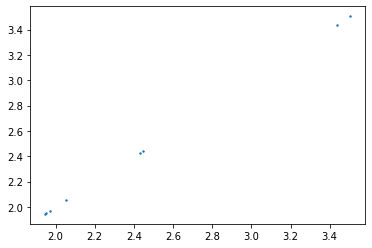

In [33]:
mapX_train = [x[0] for x in maps_train]
mapy_train = [x[1] for x in maps_train]
plt.scatter(mapX_train, mapy_train, s=2)

In [34]:
maps = []
for i in active_L_table_slide_DOA:
    testI = torch.from_numpy(i)
    prediction = model(testI.float()).tolist()
    maps.append(prediction)

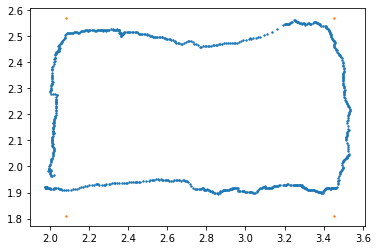

In [35]:
mapX = [x[0] for x in maps]
mapy = [x[1] for x in maps]
plt.scatter(mapX, mapy, s=2)
plt.scatter(room_x, room_y, s=2)